<center> <font size="6"> <div class="alert alert-block alert-success"> <strong> A2Z Insurance Customer Segmentation Project 
</strong> </div> </font> </center>

<center> <font size="4"> <div class="alert alert-block alert-success"> <strong> Exploratory Data Analysis 
</strong> </div> </font> </center>

## Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from math import ceil
from matplotlib.lines import Line2D
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar, colors as mpl_colors, __version__ as mplver
plt.rcParams['figure.dpi'] = 50
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

## Import Data

In [2]:
a2z_insurance = pd.read_sas(r'C:\Users\marga\Desktop\GroupV DM Proj\a2z_insurance.sas7bdat')

import data
from sas7bdat import SAS7BDAT
with SAS7BDAT(r'C:\Users\Joao\Downloads\a2z_insurance.sas7bdat', skip_header=True) as reader:
    for row in reader:
        print(row)

## Exploratory Data Analysis (EDA)


In [3]:
#check data
a2z_insurance.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [4]:
#check columns info
a2z_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
#select metric and non-metric features
non_metric_features = ["EducDeg"]
metric_features = a2z_insurance.columns.drop(non_metric_features).to_list()

In [6]:
#summary statistics
a2z_insurance.describe()

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296.00000,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,5148.50000,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.00000,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [7]:
#categorical features description
a2z_insurance.describe(include=['O']).T

,count,unique,top,freq
EducDeg,10279,4,b'3 - BSc/MSc',4799


### Visualizations

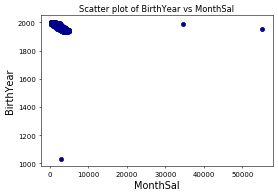

In [8]:
plt.scatter(x='MonthSal', y='BirthYear', data=a2z_insurance, color='Darkblue')
plt.rcParams['figure.figsize'] = (8, 8)

#plt.xlim(0, 5250)
#plt.ylim(1920,2020)

plt.title("Scatter plot of BirthYear vs MonthSal")
plt.ylabel('BirthYear', fontsize=14)
plt.xlabel('MonthSal', fontsize=14)

plt.savefig('Graph1.png', dpi=100)
plt.show()

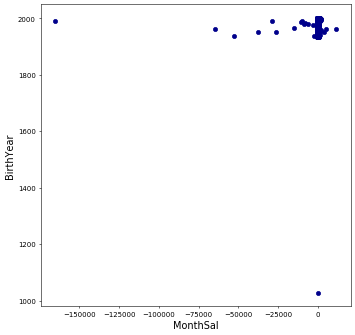

In [9]:
plt.scatter(x='CustMonVal', y='BirthYear', data=a2z_insurance, color='Darkblue')
plt.rcParams['figure.figsize'] = (8, 8)

#plt.xlim(-1000, 2500)
#plt.ylim(1920,2020)

plt.ylabel('BirthYear', fontsize=14)
plt.xlabel('MonthSal', fontsize=14)

plt.show()

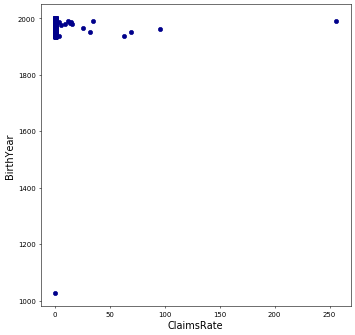

In [10]:
plt.scatter(x='ClaimsRate', y='BirthYear', data=a2z_insurance, color='Darkblue')
plt.rcParams['figure.figsize'] = (8, 8)

#plt.xlim(-5, 5)
#plt.ylim(1920,2020)

plt.ylabel('BirthYear', fontsize=14)
plt.xlabel('ClaimsRate', fontsize=14)

plt.show()

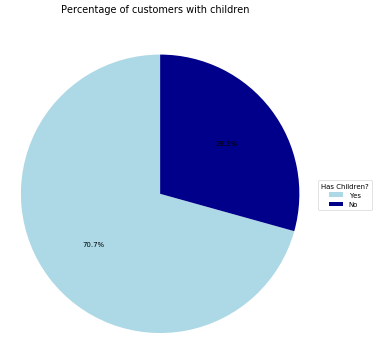

In [11]:
children = a2z_insurance['Children'].value_counts()
#children.plot(kind='pie')

labels = ['Yes', 'No']

fig1, ax1 = plt.subplots()
ax1.pie(children, 
        autopct='%1.1f%%',
        shadow=False,
        colors=['LightBlue', 'DarkBlue'],
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.rcParams['figure.figsize'] = (4, 4)
title = "Percentage of customers with children"
plt.suptitle(title, size=14)

# Adding legend
ax1.legend(labels,
          title ="Has Children?",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.show()

### Missing values

In [12]:
#percentage of data missing in each feature

na_vars_list= a2z_insurance.copy()
na_vars_list.drop(na_vars_list.columns[[0, 7, 8, 10]], axis=1, inplace=True)

for i in na_vars_list:
    print( 'Column:', i, 'NA %:' , round((len(na_vars_list[na_vars_list[i].isna() == True]))/len(i), 2) ) 

Column: FirstPolYear NA %: 2.5
Column: BirthYear NA %: 1.89
Column: EducDeg NA %: 2.43
Column: MonthSal NA %: 4.5
Column: GeoLivArea NA %: 0.1
Column: Children NA %: 2.62
Column: PremMotor NA %: 3.78
Column: PremHealth NA %: 4.3
Column: PremLife NA %: 13.0
Column: PremWork NA %: 10.75


* ### Missing values removal

In [13]:
#KNNImputer (for numerical vars)
imputer = KNNImputer(n_neighbors=5)
a2z_insurance[metric_features] = imputer.fit_transform(a2z_insurance[metric_features])

#Replace with mode (for categorical vars)
mode_EducDeg = a2z_insurance[non_metric_features].mode().loc[0]
a2z_insurance.fillna(mode_EducDeg, inplace=True)

In [14]:
#a2z_insurance.isna().any()

### Outliers

* FirstPolYear

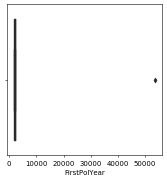

In [15]:
sns.boxplot(x='FirstPolYear', data = a2z_insurance, color='DarkBlue', linewidth=2)

In [16]:
a2z_insurance[a2z_insurance['FirstPolYear'] >= 50000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
9294,9295.0,53784.0,1948.0,b'3 - BSc/MSc',3268.0,1.0,0.0,348.85,0.37,351.4,15.0,187.37,22.45,17.78


* MonthSal

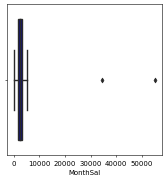

In [17]:
sns.boxplot(x='MonthSal', data = a2z_insurance, color='DarkBlue', linewidth=2)

* CustMonVal

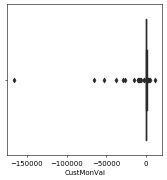

In [18]:
sns.boxplot(x='CustMonVal', data = a2z_insurance, color='DarkBlue', linewidth=2)

In [19]:
Q3 = np.percentile(a2z_insurance['CustMonVal'], 75, interpolation = 'midpoint')
Q1 = np.percentile(a2z_insurance['CustMonVal'], 25, interpolation = 'midpoint')
IQR = Q3 - Q1
a2z_insurance[~a2z_insurance['CustMonVal'].between(Q1-1.5*IQR, Q3+1.5*IQR, inclusive = True)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
51,52.0,1982.0,1966.0,b'3 - BSc/MSc',3234.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,-9.00
112,113.0,1997.0,1979.0,b'4 - PhD',2354.0,1.0,1.0,-8719.04,15.65,518.32,4.45,55.90,3.89,10.89
135,136.0,1997.0,1988.0,b'3 - BSc/MSc',2176.0,4.0,1.0,-10198.91,14.80,297.61,162.80,143.36,136.47,-3.00
171,172.0,1990.0,1989.0,b'3 - BSc/MSc',1086.0,4.0,1.0,-165680.42,256.20,378.07,78.90,166.81,6.89,18.45
257,258.0,1991.0,1995.0,b'3 - BSc/MSc',380.0,1.0,0.0,1105.42,0.21,50.90,1012.40,221.93,10.78,128.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,9798.0,1994.0,1993.0,b'2 - High School',1096.0,4.0,0.0,1367.61,0.11,46.01,1255.25,129.69,122.58,14.78
10131,10132.0,1977.0,1997.0,b'1 - Basic',986.0,3.0,1.0,1200.44,0.11,67.79,958.50,79.46,33.34,233.60
10228,10229.0,1978.0,1996.0,b'2 - High School',844.0,3.0,0.0,1041.42,0.25,51.01,1045.75,247.27,53.90,20.67
10230,10231.0,1991.0,1996.0,b'1 - Basic',1594.0,3.0,0.0,1083.11,0.14,42.34,877.40,135.58,89.35,141.36


* ClaimsRate

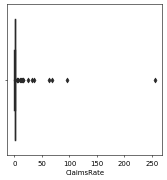

In [20]:
sns.boxplot(x='ClaimsRate', data = a2z_insurance, color='DarkBlue', linewidth=2)

In [21]:
Q3 = np.percentile(a2z_insurance['ClaimsRate'], 75, interpolation = 'midpoint')
Q1 = np.percentile(a2z_insurance['ClaimsRate'], 25, interpolation = 'midpoint')
IQR = Q3 - Q1
a2z_insurance[~a2z_insurance['ClaimsRate'].between(Q1-1.5*IQR, Q3+1.5*IQR, inclusive = True)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
51,52.0,1982.0,1966.0,b'3 - BSc/MSc',3234.0,4.0,1.0,-14714.08,25.36,557.440,20.00,29.560,5.00,-9.00
112,113.0,1997.0,1979.0,b'4 - PhD',2354.0,1.0,1.0,-8719.04,15.65,518.320,4.45,55.900,3.89,10.89
135,136.0,1997.0,1988.0,b'3 - BSc/MSc',2176.0,4.0,1.0,-10198.91,14.80,297.610,162.80,143.360,136.47,-3.00
171,172.0,1990.0,1989.0,b'3 - BSc/MSc',1086.0,4.0,1.0,-165680.42,256.20,378.070,78.90,166.810,6.89,18.45
655,656.0,1974.0,1963.0,b'3 - BSc/MSc',3279.0,3.0,1.0,-64891.00,96.00,410.300,117.25,95.350,37.34,22.56
675,676.0,1994.0,1937.0,b'2 - High School',4435.0,1.0,0.0,-52382.76,63.00,197.480,280.60,276.940,51.12,38.34
707,708.0,1991.0,1991.0,b'3 - BSc/MSc',1634.0,1.0,1.0,-28945.40,35.00,175.700,319.50,294.390,44.12,16.89
758,759.0,1988.0,1992.0,b'3 - BSc/MSc',1117.0,1.0,1.0,-10107.37,12.60,193.370,342.85,276.940,8.78,47.23
793,794.0,1980.0,1983.0,b'3 - BSc/MSc',1370.0,3.0,1.0,-7851.17,13.90,127.580,48.35,398.410,19.56,12.78
917,918.0,1986.0,1952.0,b'2 - High School',3355.0,4.0,0.0,-26130.45,32.30,135.580,290.05,221.820,86.46,100.13


* PremMotor

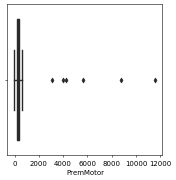

In [22]:
sns.boxplot(x='PremMotor', data = a2z_insurance, color='DarkBlue', linewidth=2)

* PremHousehold

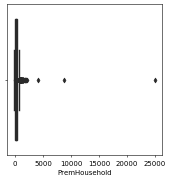

In [23]:
sns.boxplot(x='PremHousehold', data = a2z_insurance, color='DarkBlue', linewidth=2)

In [24]:
Q3 = np.percentile(a2z_insurance['PremHousehold'], 75, interpolation = 'midpoint')
Q1 = np.percentile(a2z_insurance['PremHousehold'], 25, interpolation = 'midpoint')
IQR = Q3 - Q1
a2z_insurance[a2z_insurance['PremHousehold']> Q3+1.5*IQR]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
108,109.0,1991.0,1995.0,b'1 - Basic',764.0,4.0,1.0,71.24,0.93,79.68,912.95,97.24,213.04,16.56
127,128.0,1978.0,1952.0,b'2 - High School',3481.0,3.0,0.0,-19.11,1.00,132.58,750.15,168.70,71.79,65.90
152,153.0,1981.0,1989.0,b'2 - High School',1753.0,4.0,0.0,10.34,0.97,125.80,785.70,79.57,136.47,101.13
186,187.0,1993.0,1999.0,b'1 - Basic',1247.0,2.0,1.0,-128.24,1.07,33.23,1026.30,82.57,75.68,212.15
202,203.0,1989.0,1960.0,b'3 - BSc/MSc',2544.0,4.0,1.0,183.26,0.84,163.03,927.40,159.92,45.23,34.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,10231.0,1991.0,1996.0,b'1 - Basic',1594.0,3.0,0.0,1083.11,0.14,42.34,877.40,135.58,89.35,141.36
10287,10288.0,1996.0,1941.0,b'2 - High School',3845.0,4.0,0.0,99.47,0.90,87.35,843.50,121.58,157.92,33.45
10288,10289.0,1982.0,1993.0,b'2 - High School',1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.46
10290,10291.0,1994.0,1999.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26


* PremHealth

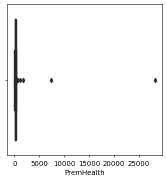

In [25]:
sns.boxplot(x='PremHealth', data = a2z_insurance, color='DarkBlue', linewidth=2)

In [26]:
Q3 = np.percentile(a2z_insurance['PremHealth'], 75, interpolation = 'midpoint')
Q1 = np.percentile(a2z_insurance['PremHealth'], 25, interpolation = 'midpoint')
IQR = Q3 - Q1
a2z_insurance[a2z_insurance['PremHealth']> Q3+1.5*IQR]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
105,106.0,1986.0,1988.0,b'3 - BSc/MSc',2019.0,4.0,1.0,-2.65,0.97,89.24,82.25,408.41,19.56,40.34
145,146.0,1983.0,1986.0,b'1 - Basic',2554.0,1.0,1.0,-96.11,1.12,144.36,-11.10,381.85,47.23,12.78
391,392.0,1991.0,1952.0,b'3 - BSc/MSc',3983.0,1.0,0.0,455.75,0.47,62.68,427.85,380.74,9.78,34.23
524,525.0,1986.0,1939.0,b'3 - BSc/MSc',4056.0,2.0,0.0,16.91,0.93,64.68,13.35,440.86,28.56,30.23
793,794.0,1980.0,1983.0,b'3 - BSc/MSc',1370.0,3.0,1.0,-7851.17,13.90,127.58,48.35,398.41,19.56,12.78
1112,1113.0,1989.0,1991.0,b'2 - High School',1927.0,1.0,1.0,102.24,0.81,72.46,98.90,432.97,28.34,34.45
1232,1233.0,1995.0,1936.0,b'4 - PhD',4061.0,1.0,0.0,9.56,0.95,145.14,87.80,381.96,9.78,34.56
1514,1515.0,1978.0,1942.0,b'3 - BSc/MSc',3450.0,4.0,0.0,100.58,0.82,138.36,117.80,401.63,12.78,25.67
2009,2010.0,1989.0,1981.0,b'3 - BSc/MSc',1973.0,4.0,1.0,219.50,0.71,74.79,288.95,442.86,27.56,16.89
3007,3008.0,1981.0,1985.0,b'2 - High School',2151.0,2.0,1.0,-25.00,1.00,109.02,103.90,383.96,53.01,50.23


* PremLife

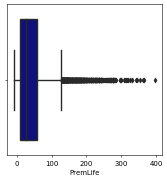

In [27]:
sns.boxplot(x='PremLife', data = a2z_insurance, color='DarkBlue', linewidth=2)

In [28]:
Q3 = np.percentile(a2z_insurance['PremLife'], 75, interpolation = 'midpoint')
Q1 = np.percentile(a2z_insurance['PremLife'], 25, interpolation = 'midpoint')
IQR = Q3 - Q1
a2z_insurance[a2z_insurance['PremLife']> Q3+1.5*IQR]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
13,14.0,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
44,45.0,1985.0,1990.0,b'3 - BSc/MSc',1065.0,1.0,1.0,-128.68,1.19,111.80,-35.00,208.26,224.71,44.23
98,99.0,1988.0,1950.0,b'1 - Basic',3870.0,1.0,1.0,179.26,0.68,204.26,82.80,110.02,185.48,59.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.0,1987.0,1988.0,b'3 - BSc/MSc',1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46
10269,10270.0,1990.0,1976.0,b'2 - High School',1858.0,1.0,1.0,-207.91,1.34,175.59,-40.55,256.16,142.36,11.00
10273,10274.0,1989.0,1992.0,b'2 - High School',1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12
10287,10288.0,1996.0,1941.0,b'2 - High School',3845.0,4.0,0.0,99.47,0.90,87.35,843.50,121.58,157.92,33.45


* PremWork

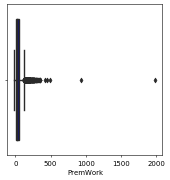

In [29]:
sns.boxplot(x='PremWork', data = a2z_insurance, color='DarkBlue', linewidth=2)

In [30]:
Q3 = np.percentile(a2z_insurance['PremWork'], 75, interpolation = 'midpoint')
Q1 = np.percentile(a2z_insurance['PremWork'], 25, interpolation = 'midpoint')
IQR = Q3 - Q1
a2z_insurance[a2z_insurance['PremWork']> Q3+1.5*IQR]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
101,102.0,1981.0,1956.0,b'1 - Basic',2694.0,3.0,1.0,654.90,0.39,62.68,648.45,210.15,31.45,156.03
107,108.0,1989.0,1958.0,b'2 - High School',3673.0,3.0,1.0,133.81,0.77,292.61,108.35,117.91,12.67,146.14
147,148.0,1979.0,1954.0,b'2 - High School',2951.0,3.0,1.0,374.41,0.43,116.69,123.90,173.81,131.47,151.25
149,150.0,1989.0,1994.0,b'1 - Basic',984.0,4.0,1.0,255.71,0.63,64.90,197.25,29.56,18.56,451.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,10214.0,1988.0,1950.0,b'2 - High School',3330.0,1.0,0.0,175.05,0.61,126.69,-70.00,188.37,119.80,150.25
10222,10223.0,1988.0,1995.0,b'2 - High School',1686.0,3.0,1.0,610.44,0.42,72.46,654.00,125.58,114.80,133.36
10230,10231.0,1991.0,1996.0,b'1 - Basic',1594.0,3.0,0.0,1083.11,0.14,42.34,877.40,135.58,89.35,141.36
10253,10254.0,1985.0,1995.0,b'1 - Basic',952.0,1.0,1.0,17.01,0.96,14.56,637.35,134.58,128.47,155.92


### Outlier removal

In [31]:
#removing outliers based on our interpretation

filters1 = (
      (a2z_insurance['FirstPolYear']<2016) 
    & (a2z_insurance['MonthSal']<=5500) 
    & (a2z_insurance['CustMonVal']>=-25000) 
    & (a2z_insurance['ClaimsRate']<=50) 
    & (a2z_insurance['PremMotor']<=700) 
    & (a2z_insurance['PremHousehold']<=2250) 
    & (a2z_insurance['PremHealth']<=500) 
    & (a2z_insurance['PremLife']<=280) 
    & (a2z_insurance['PremWork']<=500) 
)

df_1 = a2z_insurance[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / a2z_insurance.shape[0], 4))

Percentage of data kept after removing outliers: 0.9959


In [32]:
#removing outliers based on IQR values

q25 = a2z_insurance.quantile(.25)
q75 = a2z_insurance.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(a2z_insurance[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = a2z_insurance[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / a2z_insurance.shape[0], 4))

Percentage of data kept after removing outliers: 0.8543


In [33]:
#combination of the two approaches
df_3 = a2z_insurance[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / a2z_insurance.shape[0], 4))

Percentage of data kept after removing outliers: 0.9959


In [34]:
#proceed with manual filtering
a2z_ro_tmv = df_1.copy()

### Incoherence

In [35]:
#age<16
a2z_ro_tmv[a2z_ro_tmv['BirthYear'] >= 2001]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
659,660.0,1991.0,2001.0,b'1 - Basic',1284.0,4.0,1.0,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
689,690.0,1997.0,2001.0,b'1 - Basic',1180.0,3.0,1.0,436.10,0.48,54.90,406.20,65.79,112.02,256.05
865,866.0,1979.0,2001.0,b'1 - Basic',562.0,1.0,1.0,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
1436,1437.0,1989.0,2001.0,b'1 - Basic',823.0,4.0,0.0,281.28,0.60,129.58,177.80,58.01,176.70,218.15
2579,2580.0,1986.0,2001.0,b'1 - Basic',1006.0,4.0,0.0,267.95,0.67,48.23,396.75,291.50,127.58,24.45
3146,3147.0,1994.0,2001.0,b'1 - Basic',372.0,4.0,1.0,488.76,0.36,60.68,270.60,177.59,182.48,107.13
4465,4466.0,1978.0,2001.0,b'1 - Basic',958.0,4.0,0.0,-204.59,1.11,28.56,1359.15,68.79,38.23,179.59
4483,4484.0,1983.0,2001.0,b'1 - Basic',1241.0,3.0,1.0,909.17,0.13,43.34,589.55,142.47,121.80,179.48
5347,5348.0,1980.0,2001.0,b'1 - Basic',1119.0,3.0,1.0,796.71,0.23,148.14,628.45,221.82,45.12,30.23
5607,5608.0,1974.0,2001.0,b'1 - Basic',1131.0,3.0,0.0,-25.00,1.00,43.23,690.70,157.03,87.35,142.25


In [36]:
#minor having salary
a2z_ro_tmv[a2z_ro_tmv['BirthYear'] >= 2001][a2z_ro_tmv['MonthSal'] > 0]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
659,660.0,1991.0,2001.0,b'1 - Basic',1284.0,4.0,1.0,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
689,690.0,1997.0,2001.0,b'1 - Basic',1180.0,3.0,1.0,436.10,0.48,54.90,406.20,65.79,112.02,256.05
865,866.0,1979.0,2001.0,b'1 - Basic',562.0,1.0,1.0,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
1436,1437.0,1989.0,2001.0,b'1 - Basic',823.0,4.0,0.0,281.28,0.60,129.58,177.80,58.01,176.70,218.15
2579,2580.0,1986.0,2001.0,b'1 - Basic',1006.0,4.0,0.0,267.95,0.67,48.23,396.75,291.50,127.58,24.45
3146,3147.0,1994.0,2001.0,b'1 - Basic',372.0,4.0,1.0,488.76,0.36,60.68,270.60,177.59,182.48,107.13
4465,4466.0,1978.0,2001.0,b'1 - Basic',958.0,4.0,0.0,-204.59,1.11,28.56,1359.15,68.79,38.23,179.59
4483,4484.0,1983.0,2001.0,b'1 - Basic',1241.0,3.0,1.0,909.17,0.13,43.34,589.55,142.47,121.80,179.48
5347,5348.0,1980.0,2001.0,b'1 - Basic',1119.0,3.0,1.0,796.71,0.23,148.14,628.45,221.82,45.12,30.23
5607,5608.0,1974.0,2001.0,b'1 - Basic',1131.0,3.0,0.0,-25.00,1.00,43.23,690.70,157.03,87.35,142.25


In [37]:
#age>150
a2z_ro_tmv[a2z_ro_tmv['BirthYear'] < 1866]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7195,7196.0,1993.0,1028.0,b'3 - BSc/MSc',2830.0,4.0,0.0,146.02,0.77,428.97,192.8,108.91,1.89,23.67


In [38]:
#client before being born
a2z_ro_tmv[a2z_ro_tmv['BirthYear'] > a2z_ro_tmv['FirstPolYear']]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.130
13,14.0,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.460
18,19.0,1981.0,1982.0,b'1 - Basic',1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.570
22,23.0,1976.0,1986.0,b'2 - High School',1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.900
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.0,1987.0,1988.0,b'3 - BSc/MSc',1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.460
10273,10274.0,1989.0,1992.0,b'2 - High School',1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.120
10284,10285.0,1980.0,1987.0,b'3 - BSc/MSc',1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,20.626
10288,10289.0,1982.0,1993.0,b'2 - High School',1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.460


In [39]:
#parent at 16
a2z_ro_tmv[(a2z_ro_tmv['Children'] == 1) & (a2z_ro_tmv['BirthYear'] > 2000)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
659,660.0,1991.0,2001.0,b'1 - Basic',1284.0,4.0,1.0,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
689,690.0,1997.0,2001.0,b'1 - Basic',1180.0,3.0,1.0,436.10,0.48,54.90,406.20,65.79,112.02,256.05
865,866.0,1979.0,2001.0,b'1 - Basic',562.0,1.0,1.0,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
3146,3147.0,1994.0,2001.0,b'1 - Basic',372.0,4.0,1.0,488.76,0.36,60.68,270.60,177.59,182.48,107.13
4483,4484.0,1983.0,2001.0,b'1 - Basic',1241.0,3.0,1.0,909.17,0.13,43.34,589.55,142.47,121.80,179.48
5347,5348.0,1980.0,2001.0,b'1 - Basic',1119.0,3.0,1.0,796.71,0.23,148.14,628.45,221.82,45.12,30.23
9906,9907.0,1976.0,2001.0,b'1 - Basic',1422.0,1.0,1.0,467.31,0.37,69.68,231.15,201.26,191.48,82.35


In [40]:
#abnormal education degree for age
a2z_ro_tmv[((a2z_ro_tmv['EducDeg'] == b'3 - BSc/MSc') | (a2z_ro_tmv['EducDeg'] == b'4 - PhD')) & (a2z_ro_tmv['BirthYear'] > 1998)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork


* ### Incoherence Removal

In [41]:
#clients with less than 16 years of age
#len(a2z_ro_tmv[a2z_ro_tmv['BirthYear'] >= 2001])/a2z_ro_tmv.shape[0]
a2z_ro_tmv=a2z_ro_tmv[a2z_ro_tmv['BirthYear'] < 2001]

#check
#a2z_ro_tmv[a2z_ro_tmv['BirthYear'] >= 2001]
#a2z_ro_tmv[a2z_ro_tmv['BirthYear'] >= 2001][a2z_ro_tmv['MonthSal'] > 0]
#a2z_ro_tmv[(a2z_ro_tmv['Children'] == 1) & (a2z_ro_tmv['BirthYear'] > 2000)]

In [42]:
#clients with more than 150 years of age
a2z_ro_tmv=a2z_ro_tmv[a2z_ro_tmv['BirthYear'] > 1866]

#check
#a2z_ro_tmv[a2z_ro_tmv['BirthYear'] < 1866]

In [43]:
#client before being born is not possible
#we will impute the value of the BirthYear to be the FirstPolYear
a2z_ro_tmv['FirstPolYear'] = np.where(a2z_ro_tmv['FirstPolYear'] > a2z_ro_tmv['BirthYear'], a2z_ro_tmv['FirstPolYear'], a2z_ro_tmv['BirthYear'])

#check
#a2z_ro_tmv[a2z_ro_tmv['BirthYear'] > a2z_ro_tmv['FirstPolYear']]

### Feature Engineering


In [44]:
#age
a2z_ro_tmv['Age'] = 2016-a2z_ro_tmv['BirthYear']
metric_features.append('Age')

In [45]:
#how long has an individual been a client of the insurance company
a2z_ro_tmv['Client Tenure'] = 2016 - a2z_ro_tmv['FirstPolYear']
metric_features.append('Client Tenure')

In [46]:
#what is the total monthly premium (per individual)
a2z_ro_tmv['Total Premium']= sum([a2z_ro_tmv['PremMotor'], a2z_ro_tmv['PremHousehold'], a2z_ro_tmv['PremHealth'], a2z_ro_tmv['PremLife'], a2z_ro_tmv['PremWork']])
metric_features.append('Total Premium')

In [47]:
#a2z_ro_tmv['Difference']=a2z_ro_tmv['MonthSal']-sum([ a2z_ro_tmv['PremMotor'], a2z_ro_tmv['PremHousehold'], a2z_ro_tmv['PremHealth'], a2z_ro_tmv['PremLife'], a2z_ro_tmv['PremWork'] ])
#metric_features.append('Difference')

In [48]:
#distinction group according to the total monthly premium
a2z_ro_tmv['Customer_Category']=0

Customer_Category=['Bronze']*len(a2z_ro_tmv['Total Premium'])

for index, row in enumerate(a2z_ro_tmv['Total Premium']):
    
    if row <= a2z_ro_tmv['Total Premium'].quantile(0.50):
        Customer_Category[index]='Bronze'
        
    elif row <= a2z_ro_tmv['Total Premium'].quantile(0.75):
        Customer_Category[index]='Silver'
        
    elif row< a2z_ro_tmv['Total Premium'].quantile(0.90):
        Customer_Category[index]='Gold'
    else:
        Customer_Category[index]='Diamond'
        
a2z_ro_tmv=a2z_ro_tmv.assign(Customer_Category=Customer_Category)

non_metric_features.append('Customer_Category')

### Feature Selection


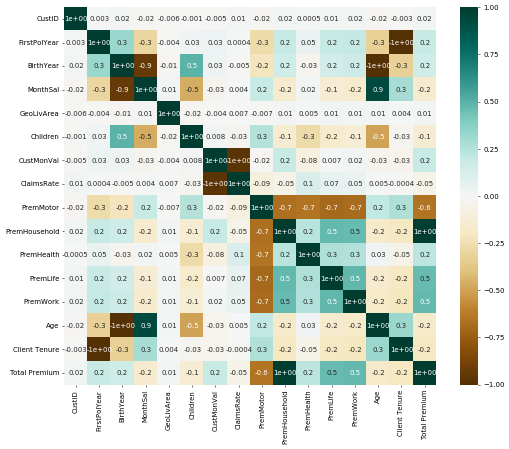

In [49]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = 'BrBG', fmt='.1')
    plt.show()
cor_spearman = a2z_ro_tmv.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [50]:
#identify high correlated pairs (>= 0.7)

corr_spearman = a2z_ro_tmv.corr(method='spearman')

metric_features = corr_spearman.index.to_list()
hcorrelated_features = []

for i in metric_features:
    for j in metric_features: 
        if round(abs(corr_spearman[i][j]),1) >= 0.7:
                if i==j:
                    next
                else:
                    if [j,i] in hcorrelated_features:
                        next
                    else:
                        hcorrelated_features.append([i,j])
print(hcorrelated_features)       

[['FirstPolYear', 'Client Tenure'], ['BirthYear', 'MonthSal'], ['BirthYear', 'Age'], ['MonthSal', 'Age'], ['CustMonVal', 'ClaimsRate'], ['PremMotor', 'PremHousehold'], ['PremMotor', 'PremHealth'], ['PremMotor', 'PremLife'], ['PremMotor', 'PremWork'], ['PremHousehold', 'Total Premium']]


In [51]:
#remove high correlated features
a2z_ro_tmv.drop(columns=['BirthYear', 
                         'FirstPolYear', 
                         'ClaimsRate',  
                         'PremHousehold', 
                         'PremLife', 
                         'PremHealth',
                         'PremWork',
                         'PremMotor',
                         'Age'], inplace=True)

metric_features_remove= ['BirthYear', 'FirstPolYear', 'ClaimsRate','PremHousehold', 
                         'PremLife', 'PremWork', 'PremHealth', 'PremMotor', 'Age']

metric_features = list(filter(lambda x: x not in metric_features_remove, metric_features))

### Data Normalization


In [52]:
#get numeric variables
metric_features
metric_features.remove('CustID')
a2z_ro_tmv.set_index('CustID', inplace=True)

* #### One-Hot Encoding

In [53]:
df_ohc = a2z_ro_tmv.copy()
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names) 
ohc_df

,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_Diamond,x1_Gold,x1_Silver
CustID,,,,,,
1.0,1.0,0.0,0.0,0.0,0.0,0.0
2.0,1.0,0.0,0.0,0.0,1.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,1.0
4.0,0.0,1.0,0.0,0.0,0.0,0.0
5.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10292.0,0.0,0.0,1.0,0.0,0.0,0.0
10293.0,0.0,0.0,0.0,1.0,0.0,0.0
10294.0,0.0,1.0,0.0,0.0,0.0,0.0


* #### Min-Max

In [54]:
df_minmax = a2z_ro_tmv.copy()
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_minmax[metric_features])
df_minmax[metric_features] = scaled_feat
df_minmax

,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,Client Tenure,Total Premium,Customer_Category
CustID,,,,,,,,
1.0,b'2 - High School',0.393345,0.000000,1.0,0.900222,0.576923,0.126701,Bronze
2.0,b'2 - High School',0.073379,1.000000,1.0,0.869682,0.192308,0.251557,Gold
3.0,b'1 - Basic',0.414676,0.666667,0.0,0.907599,0.346154,0.164880,Silver
4.0,b'3 - BSc/MSc',0.163396,1.000000,1.0,0.876488,0.384615,0.093691,Bronze
5.0,b'3 - BSc/MSc',0.305034,1.000000,1.0,0.879603,0.538462,0.108222,Bronze
...,...,...,...,...,...,...,...,...
10292.0,b'4 - PhD',0.609002,0.333333,0.0,0.877495,0.615385,0.114490,Bronze
10293.0,b'1 - Basic',0.447526,0.666667,0.0,0.961327,0.884615,0.515942,Diamond
10294.0,b'3 - BSc/MSc',0.551408,0.000000,1.0,0.908757,0.230769,0.142310,Bronze


* #### Merge

In [55]:
df_ohc=ohc_df.merge(df_minmax, left_index=True, right_index=True, how='outer')
df_ohc.drop(columns='Customer_Category', inplace=True)
df_ohc.drop(columns='EducDeg', inplace=True)
df_ohc

,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_Diamond,x1_Gold,x1_Silver,MonthSal,GeoLivArea,Children,CustMonVal,Client Tenure,Total Premium
CustID,,,,,,,,,,,,
1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.393345,0.000000,1.0,0.900222,0.576923,0.126701
2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.073379,1.000000,1.0,0.869682,0.192308,0.251557
3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.414676,0.666667,0.0,0.907599,0.346154,0.164880
4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.163396,1.000000,1.0,0.876488,0.384615,0.093691
5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.305034,1.000000,1.0,0.879603,0.538462,0.108222
...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,0.0,0.0,1.0,0.0,0.0,0.0,0.609002,0.333333,0.0,0.877495,0.615385,0.114490
10293.0,0.0,0.0,0.0,1.0,0.0,0.0,0.447526,0.666667,0.0,0.961327,0.884615,0.515942
10294.0,0.0,1.0,0.0,0.0,0.0,0.0,0.551408,0.000000,1.0,0.908757,0.230769,0.142310


### Dimensionality Reduction: PCA

In [56]:
df_pca = df_ohc.copy()

In [57]:
#perform pca
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])

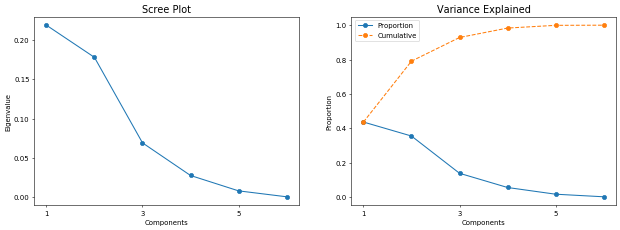

In [58]:
#initialize
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1))

#plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

#layout
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [59]:
#perform pca retaining 3 clusters
pca = PCA(n_components=3)
pca_feat = pca.fit_transform(df_pca[metric_features])

pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index

In [60]:
df_pca = pd.concat([df_pca, pca_df], axis=1)

In [61]:
#calculating loadings
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings

,PC0,PC1,PC2
MonthSal,0.552504,0.051542,-0.441172
GeoLivArea,0.111395,-0.993775,0.001404
Children,-0.989900,-0.090211,-0.078986
CustMonVal,0.002871,0.003921,0.057727
Client Tenure,0.094845,0.004014,-0.961100
Total Premium,0.066224,0.004287,0.346666


## Export pre-processed dataset

In [62]:
df_ohc.to_csv('preproc_data.csv')